In [15]:
import scipy.io
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Set global font and size properties

plt.rcParams['axes.titlepad'] = 20   # Increase space between title and plot
plt.rcParams['axes.labelpad'] = 15   # Increase space between labels and plot

plt.rcParams['font.size'] = 7         # Default text size
plt.rcParams['axes.titlesize'] = 12   # Title font size
plt.rcParams['axes.labelsize'] = 7    # Axes labels font size
plt.rcParams['xtick.labelsize'] = 7   # X-axis tick labels font size
plt.rcParams['ytick.labelsize'] = 7   # Y-axis tick labels font size
plt.rcParams['legend.fontsize'] = 7   # Legend font size
plt.rcParams['figure.dpi'] = 180      # Figure display resolution

sns.set_style("darkgrid", {
    'axes.facecolor': '0.1',  # dark grey background
    'grid.color': '0.2',      # grid lines color
    'axes.edgecolor': '0.3',  # axis edge color
    'xtick.color': '0.7',     # x-tick color
    'ytick.color': '0.7',     # y-tick color
    'text.color': '0.9',      # text color
    'axes.labelcolor': '0.9', # axes labels color
    'axes.grid': True,        # enable grid
    'grid.linestyle': '--',    # grid line style
    'figure.facecolor': '0.1' # figure face color
})

# Set the Seaborn palette for vibrant colors
sns.set_palette("colorblind")

## problem one

In [11]:
# importing relevant file
RandomWalk = scipy.io.loadmat('/Users/fomo/Documents/Kaizen/neural computation/9.40 problem sets/MIT9_40S18_pset1/RandomWalk')

# exploring matrix
X = RandomWalk['X']
# print(X.shape)

# plotting trajectory of particle fourteen
fourteen = X[13,:]
plt.plot(np.arange(len(fourteen)) ,fourteen, color = 'purple')
plt.title('Random walk of particle 14')
plt.show()
plt.clf()

# plotting all particles
for i in range(X.shape[0]):
    plt.plot(np.arange(X.shape[1]), X[i, :], alpha = 0.5)
plt.title('Random walk of all particles')
plt.show()
plt.clf()

# plotting the mean displacement of each particle
mean_displacement = X.mean(axis = 0)
print(mean_displacement.shape)
plt.plot(mean_displacement, np.arange(X.shape[1]))
plt.title('Mean displacement of all particles')
plt.show()
plt.clf()

# plotting the mean square displacement with time
mean_square_displacement = (X**2).mean(axis = 0)
print(mean_square_displacement.shape)
plt.plot(mean_square_displacement)
plt.title('Mean square displacement of all particles')
plt.show()
plt.clf()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/fomo/Documents/Kaizen/neural computation/9.40 problem sets/MIT9_40S18_pset1/RandomWalk.mat'

## problem two

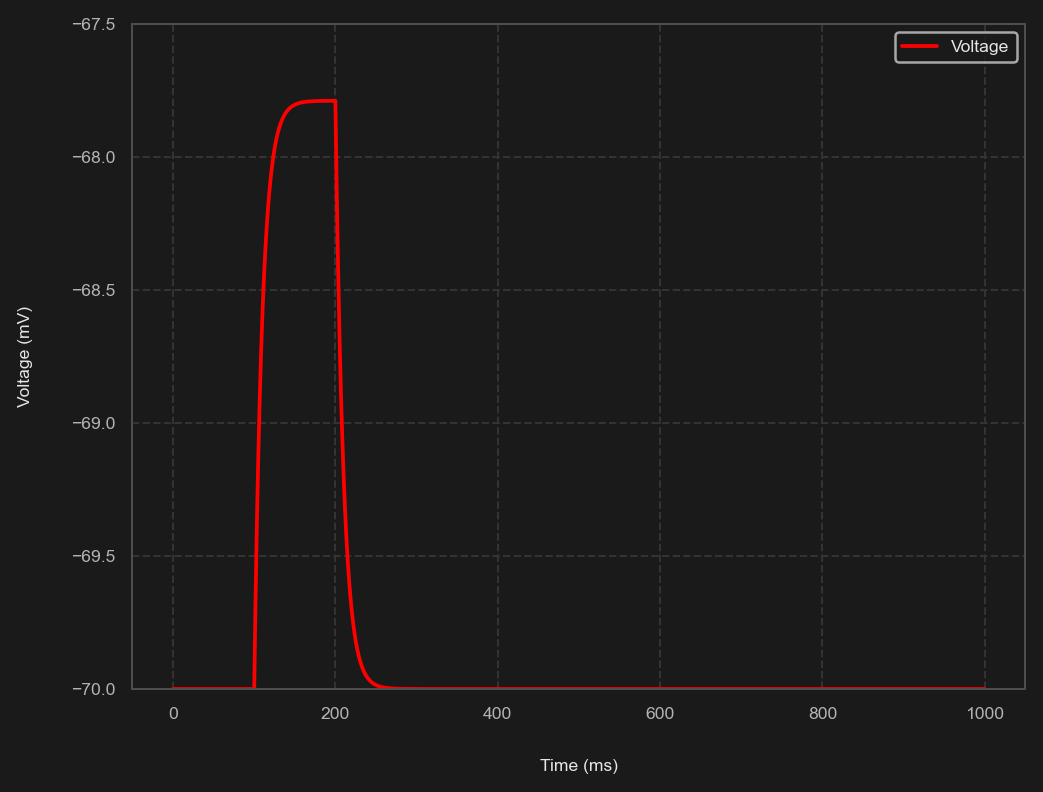

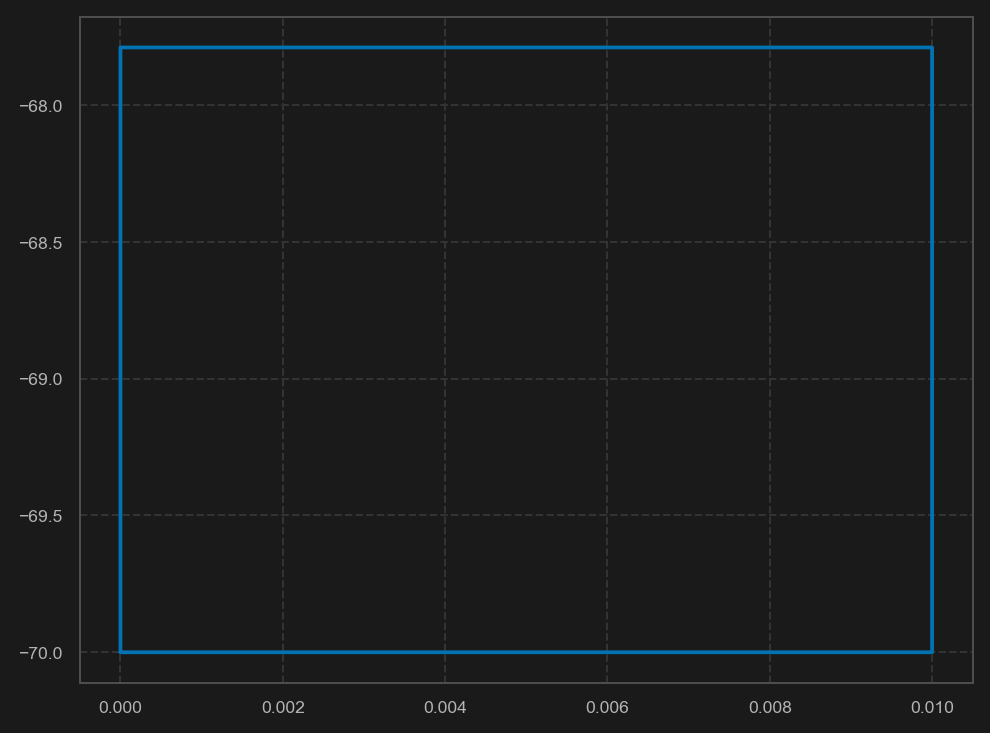

10.0


In [16]:
# cell parameters

V_rest = -70 # resting potential in mV
resistance = (10**4) / (144*np.pi) # resistance in mega-ohms
capacitance = 144*np.pi*10**(-3) 
tau = resistance*capacitance

# integration paramaters

dt = 0.1 # time-step in ms
duration = 1000 # duration in ms
iterations = int(duration/dt)

times = np.arange(0, iterations)*dt # time-vector

voltages = np.zeros(iterations, float) # output-vector
initial = V_rest
voltages[0] = initial

# pulse parameters

Ie = 0.1 # current amplitude in nano-amperes
t1 = 100 # pulse start time
t2 = 200 # pulse finish time
currents = np.where((times >= t1) & (times < t2), Ie, 0) # initialise current-vector which takes values Ie in specified temporal region

# integration computation

for i in range(0, iterations - 1):
    V_infty = V_rest + currents[i]*resistance
    voltages[i + 1] = V_infty + np.exp(-dt/tau)*(voltages[i] - V_infty)

# Find maximum voltage
Vmax = np.max(voltages)

# Calculate voltage after decay (1/e of the change)
Vdecay = V_rest + (Vmax - V_rest) / np.exp(1)

plt.plot(times, voltages, color='red', label='Voltage')
plt.xlabel('Time (ms)')
plt.ylim([-70, -67.5])
plt.ylabel('Voltage (mV)')
plt.legend()
plt.show()

plt.plot(currents**2, voltages)
plt.show()

print(tau)